In [97]:

import struct
from array import array
from os import path

In [98]:
import torch
import torchvision
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader, random_split
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torch import nn
from tqdm import tqdm
from torchvision.transforms import v2

In [99]:
# train_dataset = torchvision.datasets.MNIST(root="c:/users/abobantai/Desktop/IT/pytorchl", train=True, download=True)
# test_dataset = torchvision.datasets.MNIST(root="c:/users/abobantai/Desktop/IT/pytorchl", train=False, download=True)

In [100]:
# def read(dataset):
#     if dataset is "training":
#         path_img = "c:/users/abobantai/Desktop/IT/pytorchl/MNIST/raw/train-images-idx3-ubyte"
#         path_lbl = "c:/users/abobantai/Desktop/IT/pytorchl/MNIST/raw/train-labels-idx1-ubyte"
#     elif dataset is "testing":
#         path_img = "c:/users/abobantai/Desktop/IT/pytorchl/MNIST/raw/t10k-images-idx3-ubyte"
#         path_lbl = "c:/users/abobantai/Desktop/IT/pytorchl/MNIST/raw/t10k-labels-idx1-ubyte"
#     else:
#         raise ValueError("dataset must be \"training\" or \"testing\"")
#     with open(path_lbl, "rb") as f_label:
#         _, size = struct.unpack(">II", f_label.read(8))
#         lbl = array("b", f_label.read())
#     with open(path_img, "rb") as f_img:
#         _, size, rows, cols = struct.unpack(">IIII", f_img.read(16))
#         img = array("b", f_img.read())
#     return lbl, img, size, rows, cols
# def write_dataset(labels, data, size, rows, cols, output_dir):
#     classes = {i :f"class{i}" for i in range(10)}
#     output_dirs = [
#         path.join(output_dir, classes[i])
#         for i in range(10)
#     ]
#     for dir in output_dirs:
#         if not path.exists(dir):
#             os.makedirs(dir)
#     for (i, label) in enumerate(labels):
#         output_filename = path.join(output_dirs[label], str(i) + ".png")
#         print("writing " + output_filename)
        
#         with open(output_filename, "wb") as h:
#             data_i = [
#                 data[ (i*rows*cols + j*cols) : (i*rows*cols + (j+1)*cols) ]
#                 for j in range(rows)
#             ]
#             data_array = np.asarray(data_i)
#             im = Image.fromarray(data_array)
#             im.save(output_filename)
# output_path = "c:/users/abobantai/Desktop/IT/pytorchl/mnist"
# for dataset in ["training", "testing"]:
#     write_dataset(*read(dataset), path.join(output_path, dataset))

In [101]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [102]:
transforms = v2.Compose([
    v2.ToTensor(),
    v2.Grayscale(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=([0.5]), std=([0.5]))
])

C:\Users\abobantai\AppData\Roaming\Python\Python39\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [103]:
train_data = ImageFolder(root="mnist/training",transform=transforms)
test_data = ImageFolder(root="mnist/testing",transform=transforms)

In [104]:
train_data, val_data = random_split(train_data, [0.8, 0.2])

In [105]:
train_data = DataLoader(train_data, batch_size=64, shuffle=True)
val_data = DataLoader(val_data, batch_size=64, shuffle=False)
test_data = DataLoader(test_data, batch_size=64, shuffle=False)

In [ ]:

# model = nn.Sequential(
#     nn.Linear(784,198),
#     nn.ReLU(),
#     nn.Linear(196,49),
#     nn.LeakyReLU(),
#     nn.Linear(49,10),
#     nn.Softmax()
# ).to(device)


In [107]:
# model = nn.Sequential()
# model.add_module('lineat_layer1', nn.Linear(784, 392))
# model.add_module('relu1', nn.ReLU())
# model.add_module('linear_layer2', nn.Linear(392, 98))
# model.add_module('sigmoid2', nn.Sigmoid())
# model.add_module('linear_layer3', nn.Linear(98, 10))
# model.add_module('softmax3', nn.Softmax())
# model.to(device)


In [109]:
class myModel(nn.Module):
    def __init__(self, input, output):
        super().__init__()
        self.layer1 = nn.Linear(input, 128)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(128, output)
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.relu(x)
        return x
model = myModel(784, 10).to(device)

1-архиектура:

**гиперпараметры:**
|ТИП|ЗНАЧЕНИЕ|
|-|-|
|эпохи|120|
|оптимизатор|adam|
|вычисление ошибки|CrossEntropyLoss|
|батчи|64|


**предельная возможность**
|ТИП|ЗНАЧЕНИЕ|
|-|-|
|train_loss:         |0.2168            |
|train_acc:          |0.9383            |
|val_loss:           |0.2753            |
|val_acc:            |0.9186            |


In [ ]:
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.000001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)

In [111]:
train_loss = []
train_acc = []
val_loss = []
val_acc = []
lr_list = []

In [118]:
epochs = 60



for epoch in range(epochs):

    train_loop = tqdm(train_data, leave=False)
    true_answer = 0
    runnig_train_loss = []
    model.train()
    for x, tpred in train_loop:
        x = x.reshape(-1, 28*28).to(device)
        tpred = tpred.reshape(-1).to(torch.int32)
        tpred = torch.eye(10)[tpred].to(device)

        pred = model(x)
        los = loss(pred, tpred)

        optimizer.zero_grad()
        los.backward()
        optimizer.step()

        runnig_train_loss.append(los.item())
        mean_train_loss = sum(runnig_train_loss) / len(runnig_train_loss)

        true_answer += (pred.argmax(dim=1) == tpred.argmax(dim=1)).sum().item()

        train_loop.set_description(f"epoch [{epoch+1}], train_loss = {mean_train_loss:.4f}")
    runnig_train_acc = true_answer/64 / len(train_data)

    train_loss.append(mean_train_loss)
    train_acc.append(runnig_train_acc)


    model.eval()
    with torch.no_grad():
        runnig_val_loss = []
        true_answer = 0
        for x, tpred in val_data:
            x = x.reshape(-1, 28*28).to(device)
            tpred = tpred.reshape(-1).to(torch.int32)
            tpred = torch.eye(10)[tpred].to(device)

            pred = model(x)
            los = loss(pred, tpred)

            runnig_val_loss.append(los.item())
            mean_val_loss = sum(runnig_val_loss) / len(runnig_val_loss)
            true_answer += (pred.argmax(dim=1) == tpred.argmax(dim=1)).sum().item()
        runnig_val_acc = true_answer/64 / len(val_data)
        val_loss.append(mean_val_loss)
        val_acc.append(runnig_val_acc)
    print(f"epoch [{epoch+1}/{epochs}], train_loss = {mean_train_loss:.4f}, train_acc = {runnig_train_acc:.4f}, val_loss = {mean_val_loss:.4f}, val_acc = {runnig_val_acc:.4f}, lr = {lr}")
    scheduler.step(mean_val_loss)
    lr = scheduler._last_lr[0]
    lr_list.append(lr)

epoch [1/60], train_loss = 0.2168, train_acc = 0.9383, val_loss = 0.2753, val_acc = 0.9186, lr = 1.0000000000000004e-08


KeyboardInterrupt: 

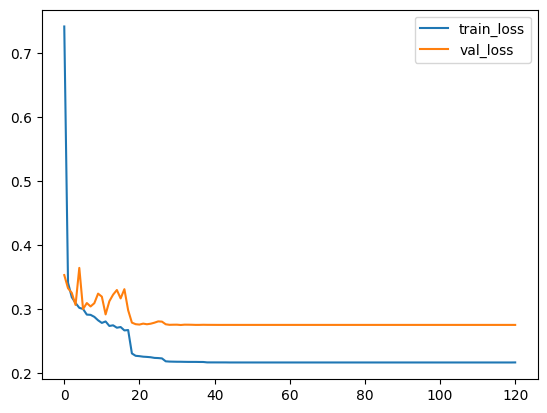

In [119]:
plt.plot(train_loss)
plt.plot(val_loss)
plt.legend(['train_loss','val_loss'])
plt.show()

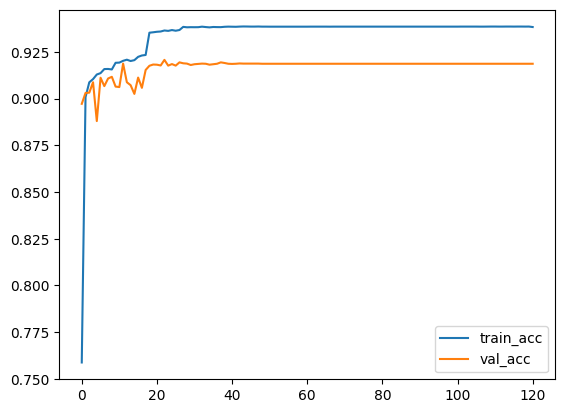

In [120]:
plt.plot(train_acc)
plt.plot(val_acc)
plt.legend(['train_acc','val_acc'])
plt.show()

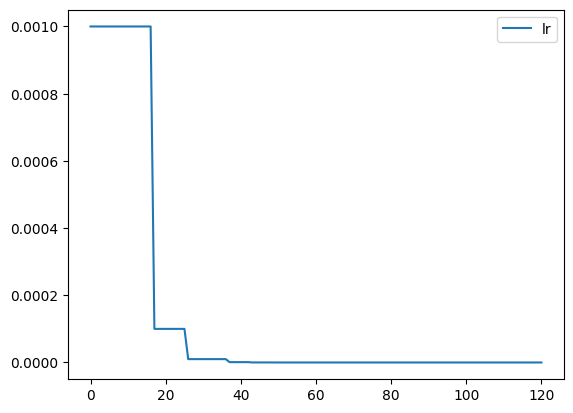

In [121]:
plt.plot(lr_list)
plt.legend(['lr'])
plt.show()

In [123]:
torch.save(model, 'models/model1.m5')